# Approach 1: Multi-Layer Perceptron; Neural Network

Curse: IS4242, Semster 1, 2024

Team: LLP


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Check on original data and merge the data into one dataframe

In [2]:
# Pre-processiong the data file 
data = pd.read_csv('data/u.data', sep='\t', header=None)
header = ['user_id', 'item_id', 'rating', 'timestamp']
data.columns = header
data = data.drop('timestamp', axis=1)
data

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [3]:
user = pd.read_csv('data/u.user', sep='|', header=None)
header = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user.columns = header
user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
item = pd.read_csv('data/u.item', sep='|', header=None, encoding='latin-1')
genre = pd.read_csv('data/u.genre', sep='|', header=None)
genre_list = genre[0].tolist()
header = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + genre_list
item.columns = header
item

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Read the train and test data
train = pd.read_csv('data/ua.train', sep='\t', header=None)
test = pd.read_csv('data/ua.test', sep='\t', header=None)

# Add the header to the train and test data
header = ['user_id', 'item_id', 'rating', 'timestamp']
train.columns = header
test.columns = header

# Drop the timestamp column
train = train.drop('timestamp', axis=1)
test = test.drop('timestamp', axis=1)

train = pd.merge(train, item, on='item_id')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90570 entries, 0 to 90569
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             90570 non-null  int64  
 1   item_id             90570 non-null  int64  
 2   rating              90570 non-null  int64  
 3   movie_title         90570 non-null  object 
 4   release_date        90562 non-null  object 
 5   video_release_date  0 non-null      float64
 6   IMDb_URL            90558 non-null  object 
 7   unknown             90570 non-null  int64  
 8   Action              90570 non-null  int64  
 9   Adventure           90570 non-null  int64  
 10  Animation           90570 non-null  int64  
 11  Children's          90570 non-null  int64  
 12  Comedy              90570 non-null  int64  
 13  Crime               90570 non-null  int64  
 14  Documentary         90570 non-null  int64  
 15  Drama               90570 non-null  int64  
 16  Fant

In [6]:
test = pd.merge(test, item, on='item_id')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             9430 non-null   int64  
 1   item_id             9430 non-null   int64  
 2   rating              9430 non-null   int64  
 3   movie_title         9430 non-null   object 
 4   release_date        9429 non-null   object 
 5   video_release_date  0 non-null      float64
 6   IMDb_URL            9429 non-null   object 
 7   unknown             9430 non-null   int64  
 8   Action              9430 non-null   int64  
 9   Adventure           9430 non-null   int64  
 10  Animation           9430 non-null   int64  
 11  Children's          9430 non-null   int64  
 12  Comedy              9430 non-null   int64  
 13  Crime               9430 non-null   int64  
 14  Documentary         9430 non-null   int64  
 15  Drama               9430 non-null   int64  
 16  Fantas

In [7]:
# Drop cols with too much Nan value
train = train.drop(['video_release_date'], axis=1)
test = test.drop(['video_release_date'], axis=1)

# Drop rows in IMDb_URL and  release date with Nan value
train = train.dropna(subset=['IMDb_URL', 'release_date'])
test = test.dropna(subset=['IMDb_URL', 'release_date'])


In [8]:
#merge user data into dataframe
train = pd.merge(train, user, on='user_id')
test = pd.merge(test, user, on='user_id')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90558 entries, 0 to 90557
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       90558 non-null  int64 
 1   item_id       90558 non-null  int64 
 2   rating        90558 non-null  int64 
 3   movie_title   90558 non-null  object
 4   release_date  90558 non-null  object
 5   IMDb_URL      90558 non-null  object
 6   unknown       90558 non-null  int64 
 7   Action        90558 non-null  int64 
 8   Adventure     90558 non-null  int64 
 9   Animation     90558 non-null  int64 
 10  Children's    90558 non-null  int64 
 11  Comedy        90558 non-null  int64 
 12  Crime         90558 non-null  int64 
 13  Documentary   90558 non-null  int64 
 14  Drama         90558 non-null  int64 
 15  Fantasy       90558 non-null  int64 
 16  Film-Noir     90558 non-null  int64 
 17  Horror        90558 non-null  int64 
 18  Musical       90558 non-null  int64 
 19  Myst

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       9429 non-null   int64 
 1   item_id       9429 non-null   int64 
 2   rating        9429 non-null   int64 
 3   movie_title   9429 non-null   object
 4   release_date  9429 non-null   object
 5   IMDb_URL      9429 non-null   object
 6   unknown       9429 non-null   int64 
 7   Action        9429 non-null   int64 
 8   Adventure     9429 non-null   int64 
 9   Animation     9429 non-null   int64 
 10  Children's    9429 non-null   int64 
 11  Comedy        9429 non-null   int64 
 12  Crime         9429 non-null   int64 
 13  Documentary   9429 non-null   int64 
 14  Drama         9429 non-null   int64 
 15  Fantasy       9429 non-null   int64 
 16  Film-Noir     9429 non-null   int64 
 17  Horror        9429 non-null   int64 
 18  Musical       9429 non-null   int64 
 19  Myster

In [10]:
train.to_csv('data/train.csv', index=False)

## Preparaing and data engineering
The train and test dataframe contains merged data of all data based on user_id and item_id as foreign key.


In [11]:
train = pd.read_csv('data/train.csv')
train.head()

,user_id,item_id,rating,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,1,1,5,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,...,0,0,0,0,0,0,24,M,technician,85711
1,1,2,3,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,...,0,0,0,1,0,0,24,M,technician,85711
2,1,3,4,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,...,0,0,0,1,0,0,24,M,technician,85711
3,1,4,3,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,...,0,0,0,0,0,0,24,M,technician,85711
4,1,5,3,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,...,0,0,0,1,0,0,24,M,technician,85711


In [12]:
# Drop user_id, item_id, movie_title and IMDb_URL
train = train.drop(['user_id', 'item_id', 'IMDb_URL', 'movie_title'], axis=1)

In [13]:
# For release date, we only need the year
train['release_date'] = pd.to_datetime(train['release_date'], errors='coerce').dt.year

In [14]:
# Encode gender
gender_mapping = {'M': 0, 'F': 1}

# Apply the mapping to the 'gender' column in both DataFrames
train['gender'] = train['gender'].map(gender_mapping)

/var/folders/l0/pq4vfnt528x589_k987sqxwr0000gn/T/ipykernel_12416/2936772560.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)


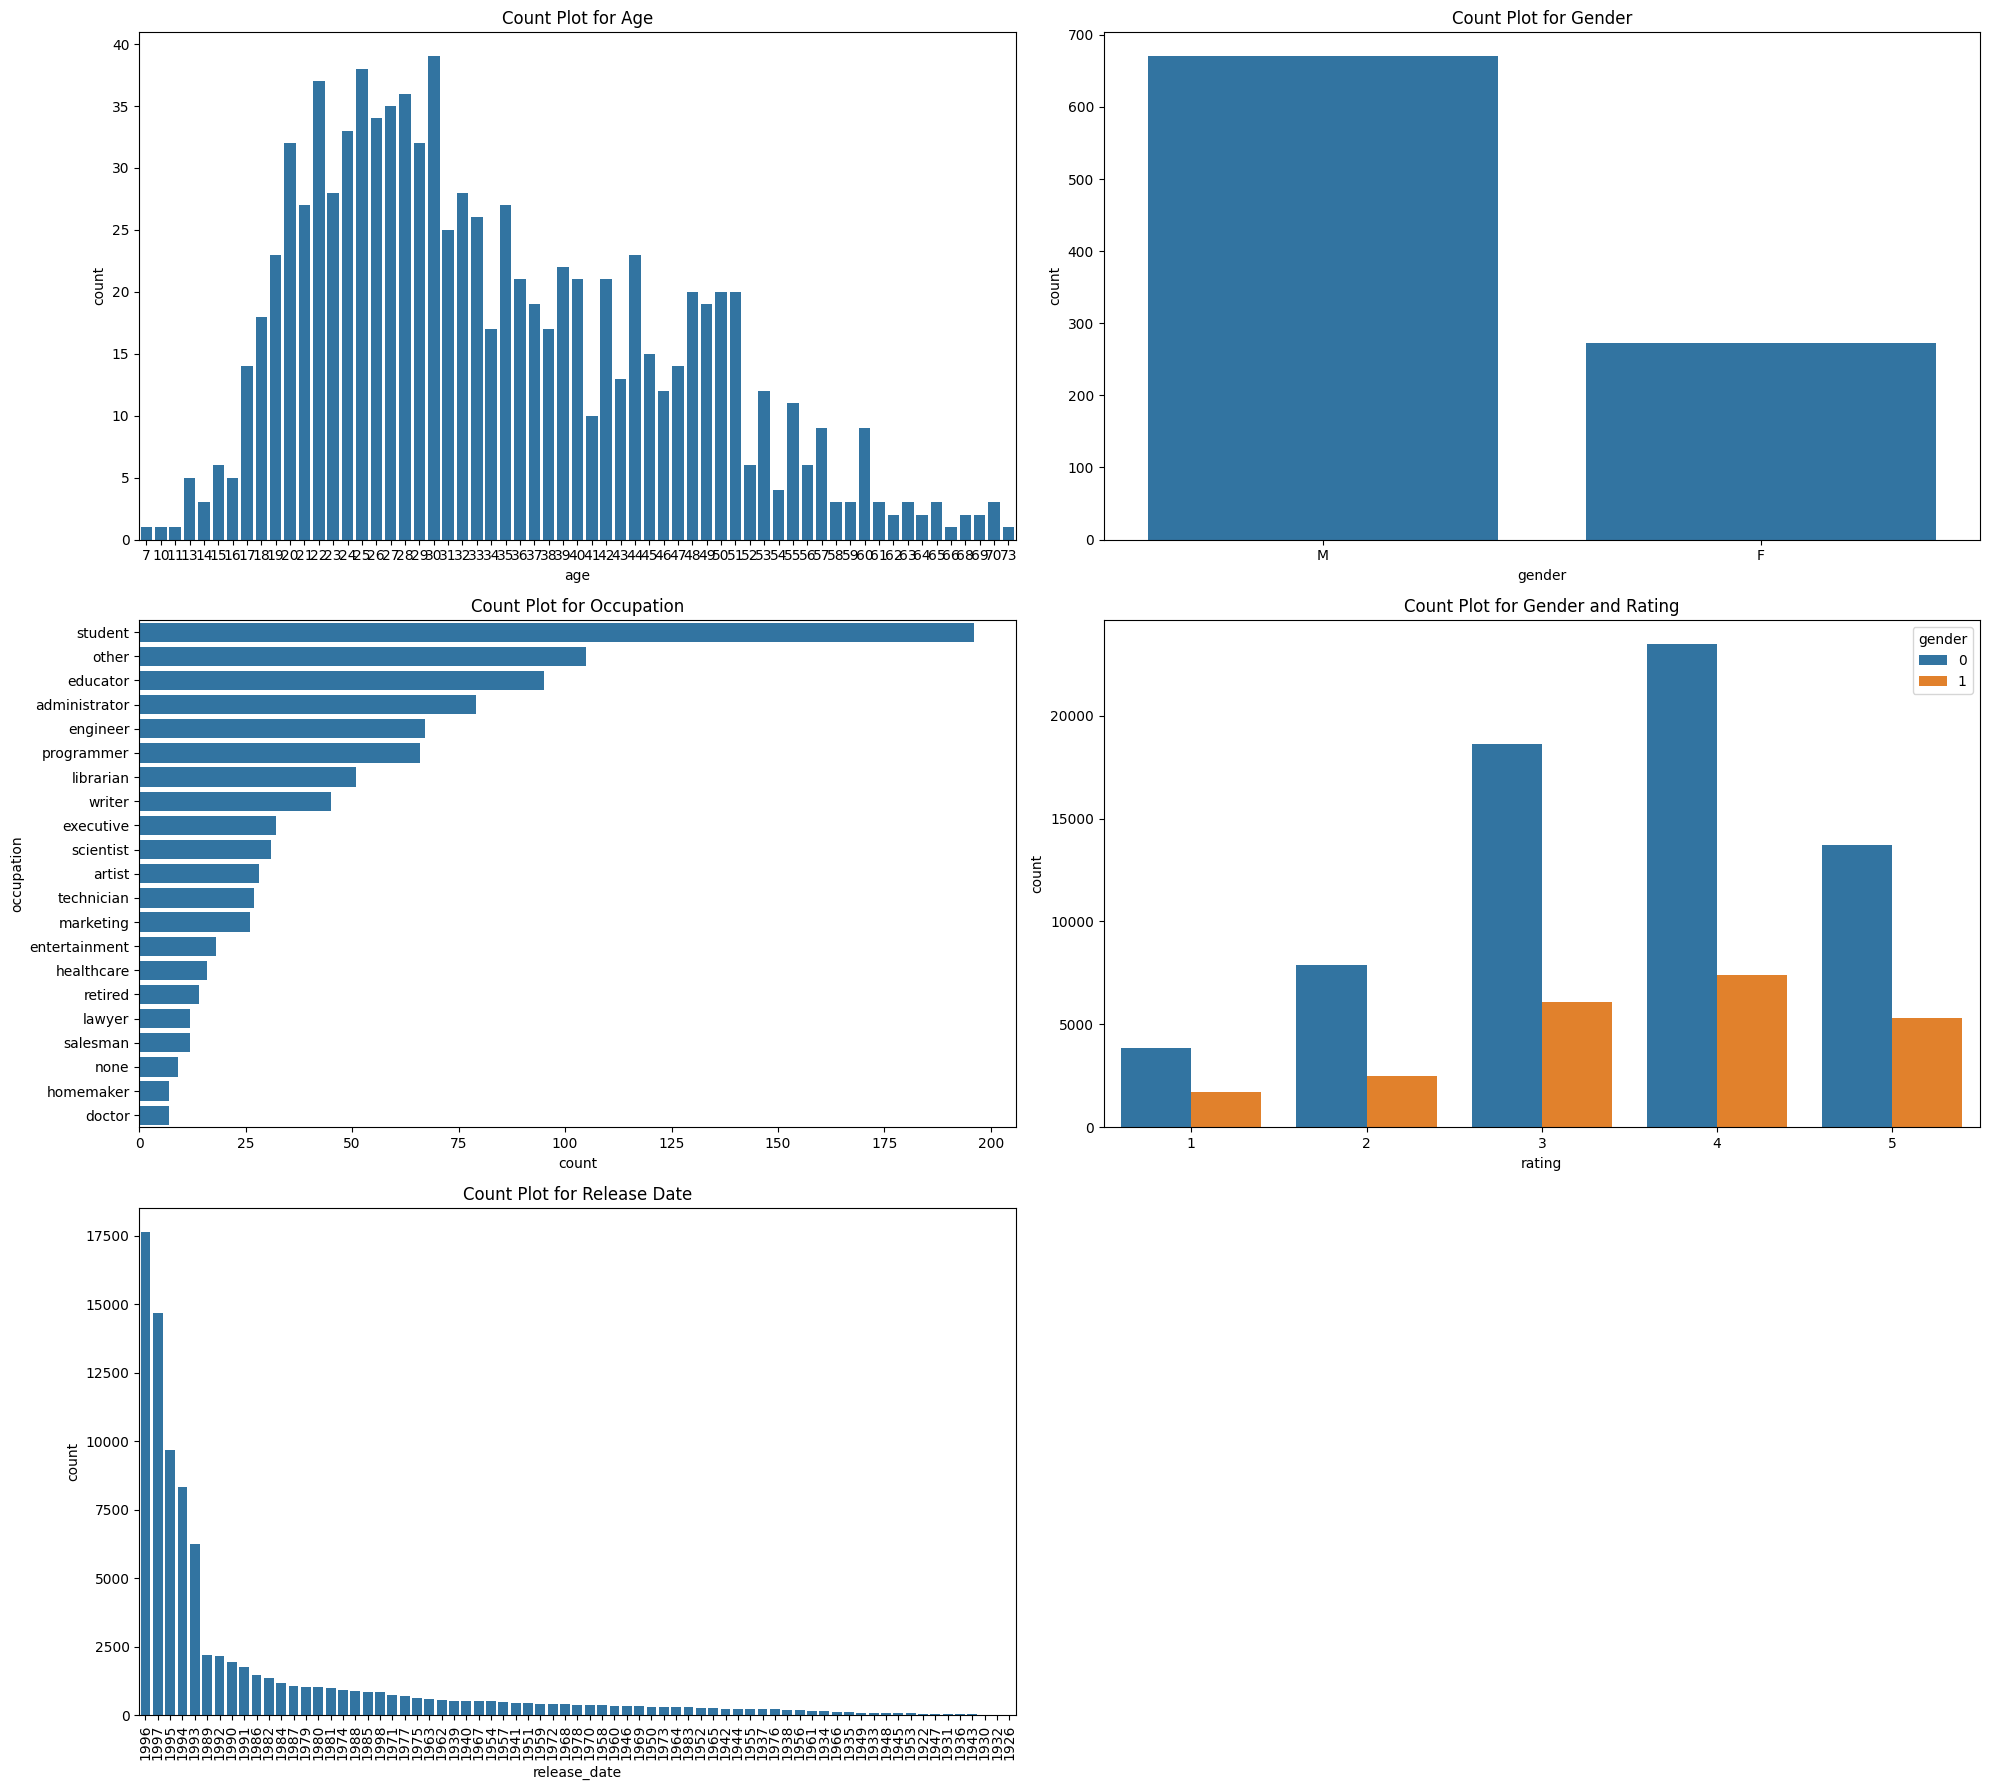

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Count plot for age
sns.countplot(x='age', data=user, ax=axes[0, 0])
axes[0, 0].set_title('Count Plot for Age')

# Count plot for gender
sns.countplot(x='gender', data=user, ax=axes[0, 1])
axes[0, 1].set_title('Count Plot for Gender')

# Count plot for occupation
sns.countplot(y='occupation', data=user, order=user['occupation'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Count Plot for Occupation')

# Count plot for gender and rating
sns.countplot(x='rating', hue='gender', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Count Plot for Gender and Rating')

# Count plot for release date
sns.countplot(x='release_date', data=train, order=train['release_date'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)
axes[2, 0].set_title('Count Plot for Release Date')

# Hide the empty subplot (axes[2, 1])
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [1]:
import torch
import torch.nn as nn

class RecommendationNet(nn.Module):
    def __init__(self, num_zips, num_occupations, embedding_dim, additional_features_dim):
        super(RecommendationNet, self).__init__()

        # Embedding layers for users, items, ZIP codes, and occupations
        self.zip_embedding = nn.Embedding(num_zips, embedding_dim)
        self.occupation_embedding = nn.Embedding(num_occupations, embedding_dim)

        # Fully connected layers for additional features
        self.fc1 = nn.Linear(embedding_dim * 4 + additional_features_dim, 128)  # Adjust for extra embedding
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, zips, occupations, additional_features):
        # Embedding lookup
        zip_embedded = self.zip_embedding(zips)
        occupation_embedded = self.occupation_embedding(occupations)

        # Concatenate embeddings with additional features
        x = torch.cat([zip_embedded, occupation_embedded, additional_features], dim=1)

        # Pass through fully connected layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        output = self.fc3(x)

        return output

In [3]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU for computations.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU for computations.")

# Create a tensor and move it to GPU (if available)
x = torch.randn(3, 3)
x = x.to(device)
print(f'Tensor device: {x.device}')

CUDA is not available. Using CPU for computations.
Tensor device: cpu
